# Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold,StratifiedKFold, cross_val_score, GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler



# Data Understanding

In [60]:
df= pd.read_csv(r"C:\Users\Lenovo\analyst_pkl\data\LEVEL_KEAHLIAN.csv")
df.head()

,Unnamed: 0,DURATIONS_PERPROJECT,TOTAL_PROJECT,STATUS,LAMA_KERJA,DIVISI,GOL,LOKASI,LEVEL KEAHLIAN
0,0,0.0,2.0,Kontrak,3,DSO,B1,Jakarta,Perekayasa Madya
1,1,7.0,6.0,Tetap,16,DSO,C3,Malang,Pimpinan Muda
2,4,29.0,3.0,Tetap,9,DIP,B3,Malang,Pimpinan Pemula
3,5,0.0,51.0,Tetap,16,DIP,C3,Malang,Pimpinan Muda
4,6,1066.0,11.0,Tetap,7,DSO,B3-MI,Malang Madani,Perekayasa Utama


In [61]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,STATUS,LAMA_KERJA,DIVISI,GOL,LOKASI,LEVEL KEAHLIAN
0,0.0,2.0,Kontrak,3,DSO,B1,Jakarta,Perekayasa Madya
1,7.0,6.0,Tetap,16,DSO,C3,Malang,Pimpinan Muda
2,29.0,3.0,Tetap,9,DIP,B3,Malang,Pimpinan Pemula
3,0.0,51.0,Tetap,16,DIP,C3,Malang,Pimpinan Muda
4,1066.0,11.0,Tetap,7,DSO,B3-MI,Malang Madani,Perekayasa Utama


# Data Prep

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DURATIONS_PERPROJECT  40 non-null     float64
 1   TOTAL_PROJECT         40 non-null     float64
 2   STATUS                40 non-null     object 
 3   LAMA_KERJA            40 non-null     int64  
 4   DIVISI                40 non-null     object 
 5   GOL                   40 non-null     object 
 6   LOKASI                40 non-null     object 
 7   LEVEL KEAHLIAN        40 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.6+ KB


## Categorical Data

In [63]:
#objt(str) to category
df['STATUS'] = df['STATUS'].astype('category')
df['DIVISI'] = df['DIVISI'].astype('category')
df['GOL'] = df['GOL'].astype('category')
df['LOKASI'] = df['LOKASI'].astype('category')

In [64]:
categorical_columns = ['STATUS', 'DIVISI', 'GOL', 'LOKASI']
encoder = OneHotEncoder(sparse_output=False)
encoded_cols = encoder.fit_transform(df[categorical_columns])

In [65]:
# Get the column names for the encoded columns
encoded_col_names = encoder.get_feature_names_out(categorical_columns)

In [66]:
# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoded_col_names)

In [67]:
# Drop the original categorical columns
df = df.drop(categorical_columns, axis=1)

In [68]:
#reset indices
df = df.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)

In [69]:
# Concatenate the DataFrame with the encoded columns
df = pd.concat([df, encoded_df], axis=1)

In [70]:
df

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA,LEVEL KEAHLIAN,STATUS_Kontrak,STATUS_Tetap,DIVISI_DAK,DIVISI_DBM,DIVISI_DIP,DIVISI_DLA,...,GOL_B3,GOL_B3-MI,GOL_B4,GOL_C1,GOL_C2,GOL_C3,GOL_F2,LOKASI_Jakarta,LOKASI_Malang,LOKASI_Malang Madani
0,0.0,2.0,3,Perekayasa Madya,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,7.0,6.0,16,Pimpinan Muda,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,29.0,3.0,9,Pimpinan Pemula,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,51.0,16,Pimpinan Muda,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1066.0,11.0,7,Perekayasa Utama,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,17.0,1.0,11,Pimpinan Pemula,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,6.0,8,Perekayasa Utama,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,3.0,9.0,15,Pimpinan Pemula,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,757.0,2.0,14,Perekayasa Utama,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,6.0,9.0,8,Perekayasa Muda,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Numerical data

In [71]:
#seperating numerical data
dfn= df[['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA']]

In [72]:
dfn.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA
0,0.0,2.0,3
1,7.0,6.0,16
2,29.0,3.0,9
3,0.0,51.0,16
4,1066.0,11.0,7


In [73]:
#X_train normalization
scaler = MinMaxScaler()
normalized = scaler.fit_transform(dfn)
normalized = pd.DataFrame(normalized, columns=['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA'])
normalized = normalized.round(2)
normalized.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA
0,0.00,0.02,0.13
1,0.00,0.10,1.00
2,0.01,0.04,0.53
3,0.00,1.00,1.00
4,0.43,0.20,0.40


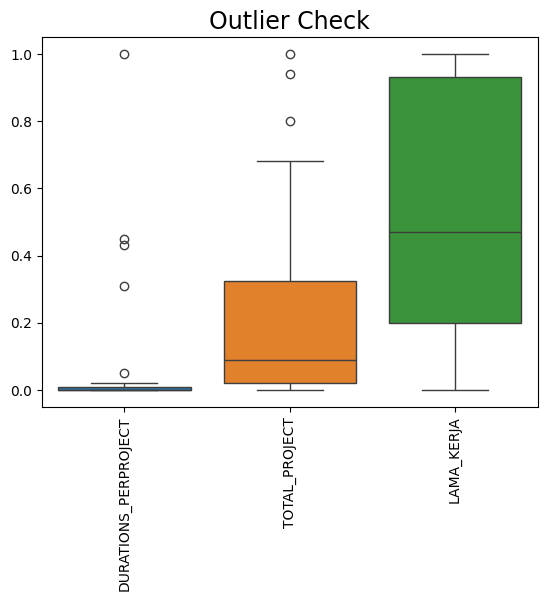

In [74]:
#displaying outliers
sns.boxplot(normalized)
plt.title("Outlier Check", size = 17)
plt.xticks(rotation = 90)
plt.show()

### DURATIONS_PERPROJECT

In [75]:
q1= normalized['DURATIONS_PERPROJECT'].quantile(0.25)
q3= normalized['DURATIONS_PERPROJECT'].quantile(0.75)
iqr= q3-q1

upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)

# find the outliers of df
normalized.loc[(normalized['DURATIONS_PERPROJECT'] > upper_limit) | (normalized['DURATIONS_PERPROJECT'] < lower_limit)]

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA
4,0.43,0.20,0.40
8,0.31,0.02,0.87
16,0.45,0.00,0.93
19,1.00,0.02,0.67
24,0.05,0.00,1.00


In [76]:
#trimming
dfn_D= normalized.loc[(normalized['DURATIONS_PERPROJECT'] < upper_limit) & (normalized['DURATIONS_PERPROJECT'] > lower_limit)]
print('before removing outliers:', len(normalized))
print('after removing outliers:', len(dfn_D))
print('outliers:', len(normalized) - len(dfn_D))

before removing outliers: 40
after removing outliers: 35
outliers: 5


<Axes: ylabel='DURATIONS_PERPROJECT'>

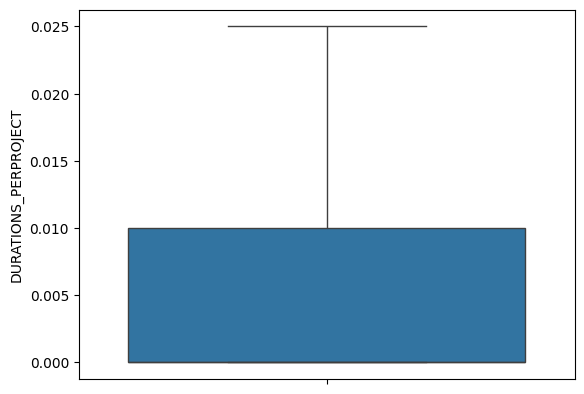

In [77]:
#capping: changing the outlier values to upper/lower limit values
dfn_D = normalized.copy()
dfn_D.loc[dfn_D['DURATIONS_PERPROJECT'] > upper_limit, 'DURATIONS_PERPROJECT'] = upper_limit
dfn_D.loc[dfn_D['DURATIONS_PERPROJECT'] < lower_limit, 'DURATIONS_PERPROJECT'] = lower_limit
sns.boxplot(dfn_D['DURATIONS_PERPROJECT'])

In [78]:
dfn_D= dfn_D.drop(['TOTAL_PROJECT', 'LAMA_KERJA'], axis=1)
dfn_D.head().round(2)

,DURATIONS_PERPROJECT
0,0.00
1,0.00
2,0.01
3,0.00
4,0.02


### TOTAL_PROJECT

In [79]:
#handling outliers w IQR [TOTAL_PROJECT]
q1= normalized['TOTAL_PROJECT'].quantile(0.25)
q3= normalized['TOTAL_PROJECT'].quantile(0.75)
iqr= q3-q1

upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)

# find the outliers of df
normalized.loc[(normalized['TOTAL_PROJECT'] > upper_limit) | (normalized['TOTAL_PROJECT'] < lower_limit)]

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA
3,0.0,1.00,1.00
26,0.0,0.94,0.87
32,0.0,0.80,0.20


In [80]:
#trimming
dfn_P= normalized.loc[(normalized['TOTAL_PROJECT'] < upper_limit) & (normalized['TOTAL_PROJECT'] > lower_limit)]
print('before removing outliers:', len(normalized))
print('after removing outliers:', len(dfn_P))
print('outliers:', len(normalized) - len(dfn_P))

before removing outliers: 40
after removing outliers: 37
outliers: 3


<Axes: ylabel='TOTAL_PROJECT'>

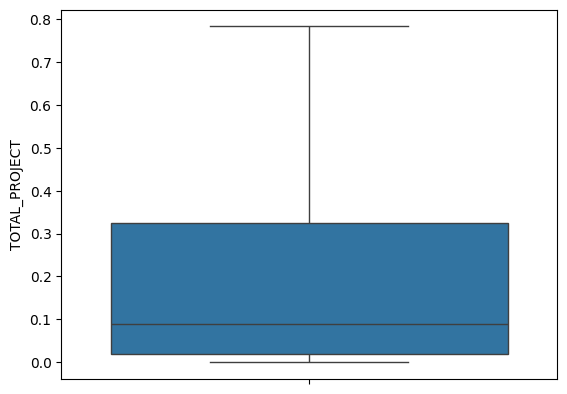

In [81]:
#capping: changing the outlier values to upper/lower limit values
dfn_P = normalized.copy()
dfn_P.loc[dfn_P['TOTAL_PROJECT'] > upper_limit, 'TOTAL_PROJECT'] = upper_limit
dfn_P.loc[dfn_P['TOTAL_PROJECT'] < lower_limit, 'TOTAL_PROJECT'] = lower_limit
sns.boxplot(dfn_P['TOTAL_PROJECT'])

In [82]:
dfn_P= dfn_P.drop(['DURATIONS_PERPROJECT', 'LAMA_KERJA'], axis=1)
dfn_P.head().round(2)

,TOTAL_PROJECT
0,0.02
1,0.10
2,0.04
3,0.78
4,0.20


## Concating to dfn

In [83]:
normalized= normalized.drop(['DURATIONS_PERPROJECT', 'TOTAL_PROJECT'], axis=1)

In [84]:
dfn.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA
0,0.0,2.0,3
1,7.0,6.0,16
2,29.0,3.0,9
3,0.0,51.0,16
4,1066.0,11.0,7


In [85]:
#reuniting them to X_train
dfn_new = pd.concat([dfn_D, dfn_P, normalized], axis=1)

In [86]:
dfn_new.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA
0,0.000,0.0200,0.13
1,0.000,0.1000,1.00
2,0.010,0.0400,0.53
3,0.000,0.7825,1.00
4,0.025,0.2000,0.40


In [87]:
dfn_new=dfn_new.copy()

In [88]:
df= df.drop(['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA'], axis=1)

In [89]:
#combining the final X_train

#checking the indices
print(dfn_new.index)
print(df.index)

RangeIndex(start=0, stop=40, step=1)
RangeIndex(start=0, stop=40, step=1)


In [90]:
#reset indices
dfn_new = dfn_new.reset_index(drop=True)
df = df.reset_index(drop=True)

In [91]:
#concating
df = pd.concat([dfn_new, df], axis=1)

In [92]:
df.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA,LEVEL KEAHLIAN,STATUS_Kontrak,STATUS_Tetap,DIVISI_DAK,DIVISI_DBM,DIVISI_DIP,DIVISI_DLA,...,GOL_B3,GOL_B3-MI,GOL_B4,GOL_C1,GOL_C2,GOL_C3,GOL_F2,LOKASI_Jakarta,LOKASI_Malang,LOKASI_Malang Madani
0,0.000,0.0200,0.13,Perekayasa Madya,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000,0.1000,1.00,Pimpinan Muda,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.010,0.0400,0.53,Pimpinan Pemula,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000,0.7825,1.00,Pimpinan Muda,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.025,0.2000,0.40,Perekayasa Utama,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Data Modelling & Evaluations

## Feature Selection

In [93]:
#data feature selection
X= df.drop(['LEVEL KEAHLIAN'], axis=1)
y= df['LEVEL KEAHLIAN']

In [94]:
X.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA,STATUS_Kontrak,STATUS_Tetap,DIVISI_DAK,DIVISI_DBM,DIVISI_DIP,DIVISI_DLA,DIVISI_DMS,...,GOL_B3,GOL_B3-MI,GOL_B4,GOL_C1,GOL_C2,GOL_C3,GOL_F2,LOKASI_Jakarta,LOKASI_Malang,LOKASI_Malang Madani
0,0.000,0.0200,0.13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000,0.1000,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.010,0.0400,0.53,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000,0.7825,1.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.025,0.2000,0.40,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Train Test Split

In [95]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [96]:
#sm = RandomOverSampler(random_state=42)
#X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

## KFold

the differences of KFold and StratifiedKFold
KFold
1. **Cara Kerja**: Membagi dataset secara acak menjadi k-fold. Setiap fold digunakan sebagai data testing sekali, sedangkan sisanya sebagai data training.
2. **Kekurangan**: Tidak menjamin distribusi kelas yang sama pada setiap fold, terutama jika dataset tidak seimbang. Hal ini bisa menyebabkan bias dalam evaluasi model.

StratifiedKFold
1. **Cara Kerja**: Membagi dataset menjadi k-fold, tetapi memastikan bahwa proporsi kelas dalam setiap fold sama dengan proporsi kelas dalam dataset keseluruhan.
2. **Keuntungan**: Menjaga distribusi kelas yang seimbang pada setiap fold, sehingga evaluasi model lebih 3. representatif. Sangat berguna untuk dataset yang tidak seimbang.
3. **Kekurangan**: Membutuhkan informasi tentang kelas target.

In [97]:
# kf = KFold(n_splits=5,shuffle=True, random_state=42)
# kf

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
skf

StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

In [98]:
models= {
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

In [99]:
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
    
    # Print cross-validation scores line by line
    print(f"{model_name} Cross-validation scores:")
    for i, score in enumerate(scores, start=1):
        print(f"  Fold {i}: {score:.6f}")
    
    # Print mean cross-validation score
    mean_score = np.mean(scores)
    print(f"{model_name} Mean cross-validation score: {mean_score:.2f}\n")

Decision Tree Classifier Cross-validation scores:
  Fold 1: 0.454545
  Fold 2: 0.454545
  Fold 3: 0.300000
Decision Tree Classifier Mean cross-validation score: 0.40



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Random Forest Classifier Cross-validation scores:
  Fold 1: 0.545455
  Fold 2: 0.454545
  Fold 3: 0.300000
Random Forest Classifier Mean cross-validation score: 0.43

Naive Bayes Cross-validation scores:
  Fold 1: 0.363636
  Fold 2: 0.363636
  Fold 3: 0.300000
Naive Bayes Mean cross-validation score: 0.34



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [100]:
# Hyperparameter Tuning for Decision Tree Classifier
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42, 100, 50]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=skf, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Best parameters and score for Decision Tree
print("Decision Tree Hyperparameter Tuning Results:")
print(f"Best parameters: {grid_search_dt.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_dt.best_score_:.6f}\n")


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Decision Tree Hyperparameter Tuning Results:
Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}
Best cross-validation accuracy: 0.403030



## Evaluations

In [101]:
import optuna

In [103]:
def objective(trial):
    # Hyperparameter yang akan di-tuning
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    # Inisialisasi RandomForestClassifier dengan hyperparameter yang disarankan oleh Optuna
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    # Menghitung skor cross-validation
    score = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

# Membuat study Optuna dan memulai tuning
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Menampilkan hasil hyperparameter terbaik
print("Best hyperparameters: ", study.best_params)

# Melatih model dengan hyperparameter terbaik
best_clf = RandomForestClassifier(**study.best_params)
best_clf.fit(X_train, y_train)

# Evaluasi model pada test set
y_pred = best_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {test_accuracy:.4f}")

[I 2024-08-12 16:44:20,280] A new study created in memory with name: no-name-33d7a6bf-7c7d-4aef-8075-661ec8a03870
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
[I 2024-08-12 16:44:20,833] Trial 0 finished with value: 0.2212121212121212 and parameters: {'n_estimators': 197, 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 0 with value: 0.2212121212121212.
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
[I 2024-08-12 16:44:21,529] Trial 1 finished with value: 0.43636363636363634 and parameters: {'n_estimators': 179, 'max_depth': 8, 'min_samples_split': 12, 'min_samples_leaf': 2, 'max_f

Best hyperparameters:  {'n_estimators': 144, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Test set accuracy: 0.5000


In [105]:
modela = RandomForestClassifier(
        n_estimators=14,
        max_depth=5,
        min_samples_split=9,
        min_samples_leaf=1,
        max_features='sqrt',
        random_state=42)
#y_pred_dt = best_model_dt.predict(X_test)
modela.fit(X_train, y_train)
y_pred_dt = modela.predict(X_test)
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Test set accuracy: {test_accuracy_dt:.2f}\n")

Decision Tree Test set accuracy: 0.50



In [ ]:
# Evaluate the best models on the test set
best_model_dt = grid_search_dt.best_estimator
y_pred_dt = best_model_dt.predict(X_test)
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Test set accuracy: {test_accuracy_dt:.2f}\n")

Decision Tree Test set accuracy: 0.25



In [46]:
# Train and evaluate each model on the test set
for model_name, model in models.items():
    model.fit(X_train, y_train)
    #model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Test set accuracy: {test_accuracy:.2f}\n")
    #cm = confusion_matrix(y_test, y_pred)
    #print(cm)
    

Decision Tree Classifier Test set accuracy: 0.25

Random Forest Classifier Test set accuracy: 0.50

Naive Bayes Test set accuracy: 0.25



In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
y.value_counts()